In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Project - 1 | Machine Learning/combinedcsv.csv'
df = pd.read_csv(file_path)


In [7]:
target = df['malicious']
df = df.drop(columns=['malicious', 'md5_hash'])

# Standardize the data (recommended for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

pca = PCA(n_components=n_components_95)
pca_result = pca.fit_transform(df_scaled)

Epoch 1/10000
1545/1545 - 5s - loss: 0.3196 - accuracy: 0.8946 - val_loss: 0.2567 - val_accuracy: 0.9151 - lr: 0.0010 - 5s/epoch - 3ms/step
Epoch 2/10000
1545/1545 - 4s - loss: 0.2427 - accuracy: 0.9226 - val_loss: 0.2563 - val_accuracy: 0.9173 - lr: 0.0010 - 4s/epoch - 2ms/step
Epoch 3/10000
1545/1545 - 3s - loss: 0.2411 - accuracy: 0.9233 - val_loss: 0.2575 - val_accuracy: 0.9157 - lr: 0.0010 - 3s/epoch - 2ms/step
Epoch 4/10000
1545/1545 - 3s - loss: 0.2408 - accuracy: 0.9234 - val_loss: 0.2578 - val_accuracy: 0.9173 - lr: 0.0010 - 3s/epoch - 2ms/step
Epoch 5/10000
1545/1545 - 5s - loss: 0.2409 - accuracy: 0.9231 - val_loss: 0.2556 - val_accuracy: 0.9187 - lr: 0.0010 - 5s/epoch - 3ms/step
Epoch 6/10000
1545/1545 - 4s - loss: 0.2414 - accuracy: 0.9235 - val_loss: 0.2580 - val_accuracy: 0.9183 - lr: 0.0010 - 4s/epoch - 2ms/step
Epoch 7/10000
1545/1545 - 3s - loss: 0.2408 - accuracy: 0.9230 - val_loss: 0.2557 - val_accuracy: 0.9185 - lr: 0.0010 - 3s/epoch - 2ms/step
Epoch 8/10000
1545/1

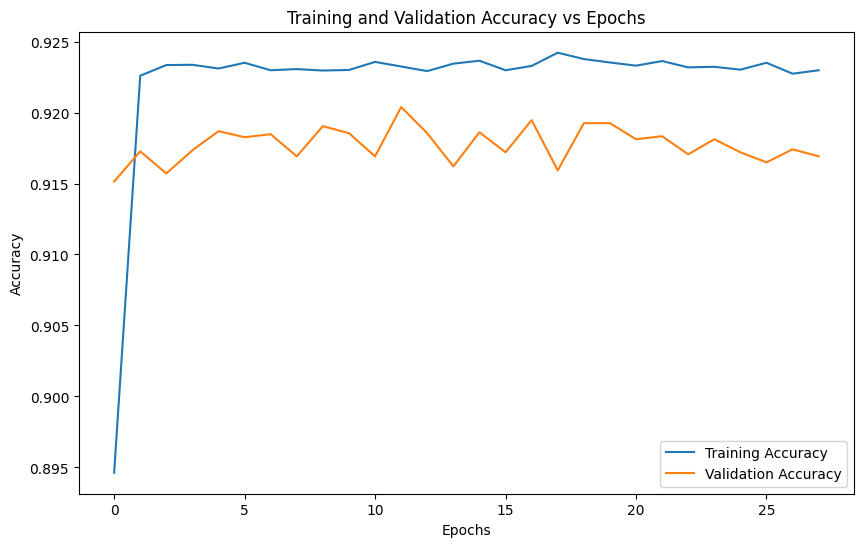

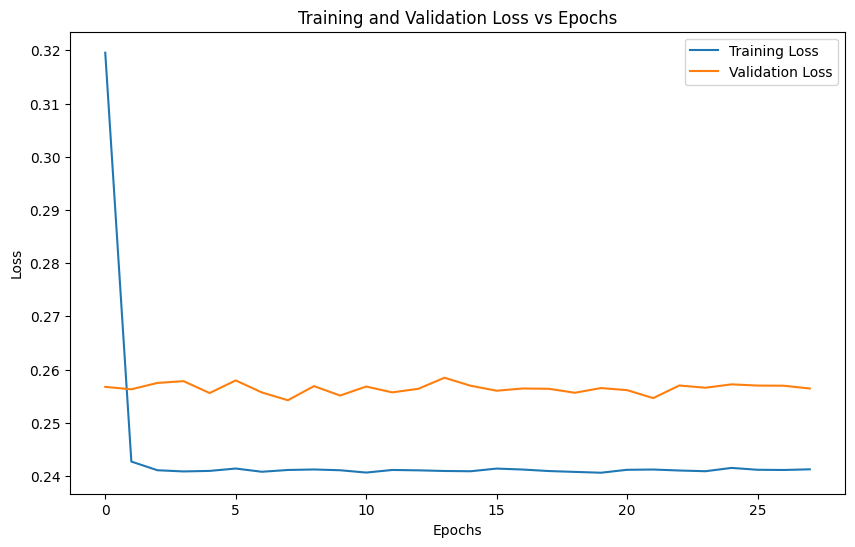

221/221 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.9214
Test Accuracy: 0.92
Test Loss: 0.2431
221/221 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2870  287]
 [ 268 3635]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3157
           1       0.93      0.93      0.93      3903

    accuracy                           0.92      7060
   macro avg       0.92      0.92      0.92      7060
weighted avg       0.92      0.92      0.92      7060



In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(pca_result, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Build the Logistic Regression model using TensorFlow and Keras
model = tf.keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(pca_result.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose = 1,restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20,verbose = 1)

# Train the model and record training history
history = model.fit(X_train, y_train, epochs=10000, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Plot Training and Validation Accuracy vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

# Plot Training and Validation Loss vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.show()

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Loss: {test_loss:.4f}')

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

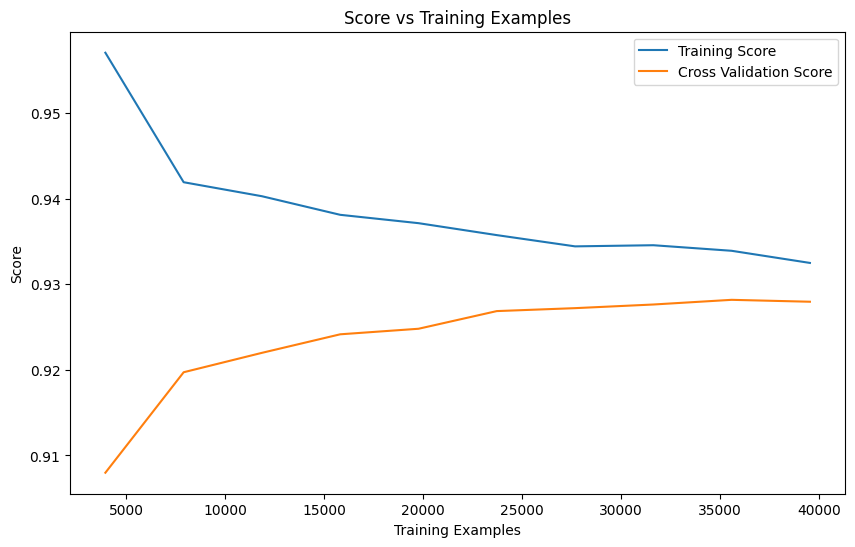

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Project - 1 | Machine Learning/combinedcsv.csv'
df = pd.read_csv(file_path)

# Separate target variable
target = df['malicious']
df = df.drop(columns=['malicious', 'md5_hash'])

# Standardize the data (recommended for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Determine the number of components to retain 95% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components_95)
pca_result = pca.fit_transform(df_scaled)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(pca_result, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Build the Logistic Regression model
logreg = LogisticRegression()

# Plot Score vs Training Examples Graph (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(clone(logreg), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Score vs Training Examples')
plt.legend()
plt.show()
